<h1 align="center">Fase 2 - Machine Learning and Time Series</h1>

## Módulo 01 - Machine Learning com Python

### Aula 1 - Bibliotecas Fundamentais e Primeiros Passos em ML
- **Descrição:** A aula 1 é composta de 9 partes  que se exploram as principais bibliotecas de Python para Machine Learning, como Numpy, Pandas, Matplotlib e Scikit-Learn. Além disso, é apresentado o conceito de Machine Learning e suas principais categorias. Optou-se por não fazer anotações dessa aula, pois o conteúdo é muito básico e introdutório. Exceto pela parte 9, que é sobre a biblioteca Scikit-Learn, que é uma das mais importantes para Machine Learning em Python. 

#### 1. Para realizar a análise dos dados, as seguintes bibliotecas foram utilizadas:
* **sys**: para manipulação de variáveis do sistema.
* **os**: para manipulação de arquivos e diretórios.
* **Pandas**: para manipulação e análise dos dados.
* **Numpy**: para manipulação de arrays e operações matemáticas.
* **Matplotlib**: para visualização dos dados.
* **Scikit-learn**: para aplicação de algoritmos de Machine Learning.


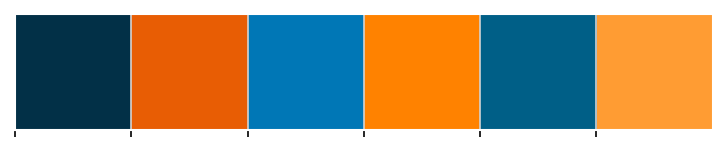

In [42]:
# Data manipulation and visualization.
import sys
import os
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

# Add the project root directory to sys.path
sys.path.append(os.path.abspath('../../'))

# Now try importing the module
from scripts.data_visualization.style_visualization import *
from scripts.data_visualization.plot_visualization import *
from scripts.data_analysis.outlier_detection import *
from scripts.utils.custom_exceptions import *

# Set up the visualization environment with a custom color palette
custom_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#005f87', '#ff9c33']
configure_visualization(palette=custom_palette)

#### 2. Aquisição dos dados
- **Descrição:** Os dados utilizados foram fornecidos em aula  e estão disponíveis no github da Pos-Tech da FIAP. O arquivo traz informações sobre diabetes e foi utilizado para a aplicação de algoritmos de Machine Learning. fonte dos dados: https://github.com/FIAP/Pos_Tech_DTAT/blob/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/diabetes.csv

##### 2.1 -  Importando a Base de dados 

In [43]:
# Corrigir o caminho para subir um nível na estrutura de diretórios antes de acessar 'data/raw'
file_path = os.path.join(os.path.abspath('../../'), 'data/raw/diabetes.csv')

df_diabetes = pd.read_csv('../../data/raw/diabetes.csv')

In [44]:
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### 2.2 -  Definindo os dados para treino e separando os dados de treino e teste. 
* Observação : Como a base de dados é pequena, foi utilizado 70% dos dados para treino e 30% para teste.

In [45]:
x = df_diabetes.drop(['Class variable'], axis=1)

In [46]:
y = df_diabetes['Class variable']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [48]:
len(x_train), len(x_test)

(537, 231)

##### 2.3 -  Importando o modelo escolhido para a aplicação do algoritmo de Machine Learning.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)

* **Treinando o modelo com os dados de treino.**

In [51]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

* **Testando o modelo com os dados de teste.**

In [52]:
accuracy = knn.score(x_test, y_test)

* Observação : O modelo teve 70% de acurácia, o que é um bom resultado para um modelo simples.

In [53]:
accuracy

0.683982683982684

### Aula 2 - Análise Exploratória de Dados (EDA)

#### 1. Aquisição dos dados
* Os dados utilzados são adquiridos do spotfy e estão disponíveis no github da Pos-Tech da FIAP. O arquivo traz informações sobre músicas do Rolling Stones e foi utilizado para a aplicação de algoritmos de Machine Learning.

* As colunas neste conjunto de dados são: 
    * **nome**: nome da música.
    * **album**: nome do álbum.
    * **release_date**: o dia, mês e ano em que a música foi lançada.
    * **numero da faixa**: a ordem em que a música aparece no álbum.
    * **id**: identificador do Spotify para a música.
    * **uri** o uri do Spotify para a música.
    * **acústica**: uma medida de confianca de 0.0 a 1.0 de quão acústica a música é.
    * **danceability**: Danceability descreve quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força do ritmo e regularidade geral. Um valor de 0.0 é menos dançante e 1.0 é mais dançante.
    * **energia**: energia é uma medida de 0.0 a 1.0 e representa uma medida perceptual de intensidade e atividade. Geralmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto uma balada de Bach tem baixa energia.
    * **intrumentalness**: prevê se uma faixa não contém vocais. Quanto mais próximo o valor de instrumentalidade for de 1.0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1.0.
    * **vivacidade**: Detecta a presença de uma audiência na gravação. Valores acima de 0,8 destinam-se a representar faixas ao vivo.
    * **loudness**: o volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas.
    * **locução**: detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação, mais próximo o valor de locução será de 1.0.Valores acima de 0,66 descrevem faixas que são provavelmente feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, ou são puramente instrumentais. Valores abaixo de 0,33 provavelmente representam música e outras faixas não faladas.
    * **tempo**: o tempo estimado da faixa em batidas por minuto (BPM). Em terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do batimento.
    * **valence**: uma medida de 0.0 a 1.0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado).
    * **popularidade**: a popularidade da musica de 0 a 100.
    * **duration_ms**: a duração da música em milissegundos.


* **Carregando a base de dados.**

In [54]:
df = pd.read_excel('../../data/raw/dataset_rolling_stones.xlsx')
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


* **Verificando a necessidade de limpeza e tratamento dos dados.**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   name              object        
 1   album             object        
 2   release_date      datetime64[ns]
 3   track_number      int64         
 4   acousticness      float64       
 5   danceability      float64       
 6   energy            float64       
 7   instrumentalness  float64       
 8   liveness          float64       
 9   loudness          float64       
 10  speechiness       float64       
 11  tempo             float64       
 12  valence           float64       
 13  popularity        int64         
 14  duration_ms       int64         
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 188.8+ KB


In [56]:
df.shape

(1610, 15)

In [57]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(6)

In [59]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


#### 2 Explorando os dados

In [60]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


##### Observação: para manter um padrão mais "comum" a duração das músicas foi convertida de milissegundos para minutos.

In [61]:
df["duracao_em_min"] = df['duration_ms']/60000
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [62]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


In [65]:
df.groupby('album')['duracao_em_min'].mean()

album
12 X 5                                                                             2.682068
12 x 5                                                                             2.682772
A Bigger Bang (2009 Re-Mastered)                                                   4.016356
A Bigger Bang (Live)                                                               5.176630
Aftermath                                                                          3.899185
Aftermath (UK Version)                                                             3.800520
Beggars Banquet                                                                    3.964705
Beggars Banquet (50th Anniversary Edition)                                         3.981148
Between The Buttons                                                                3.204856
Between The Buttons (UK Version)                                                   3.203124
Between The Buttons (US track listing)                                    

In [67]:
df_maior_duracao_musica = df.groupby('album')['duracao_em_min'].mean().sort_values(ascending=False)

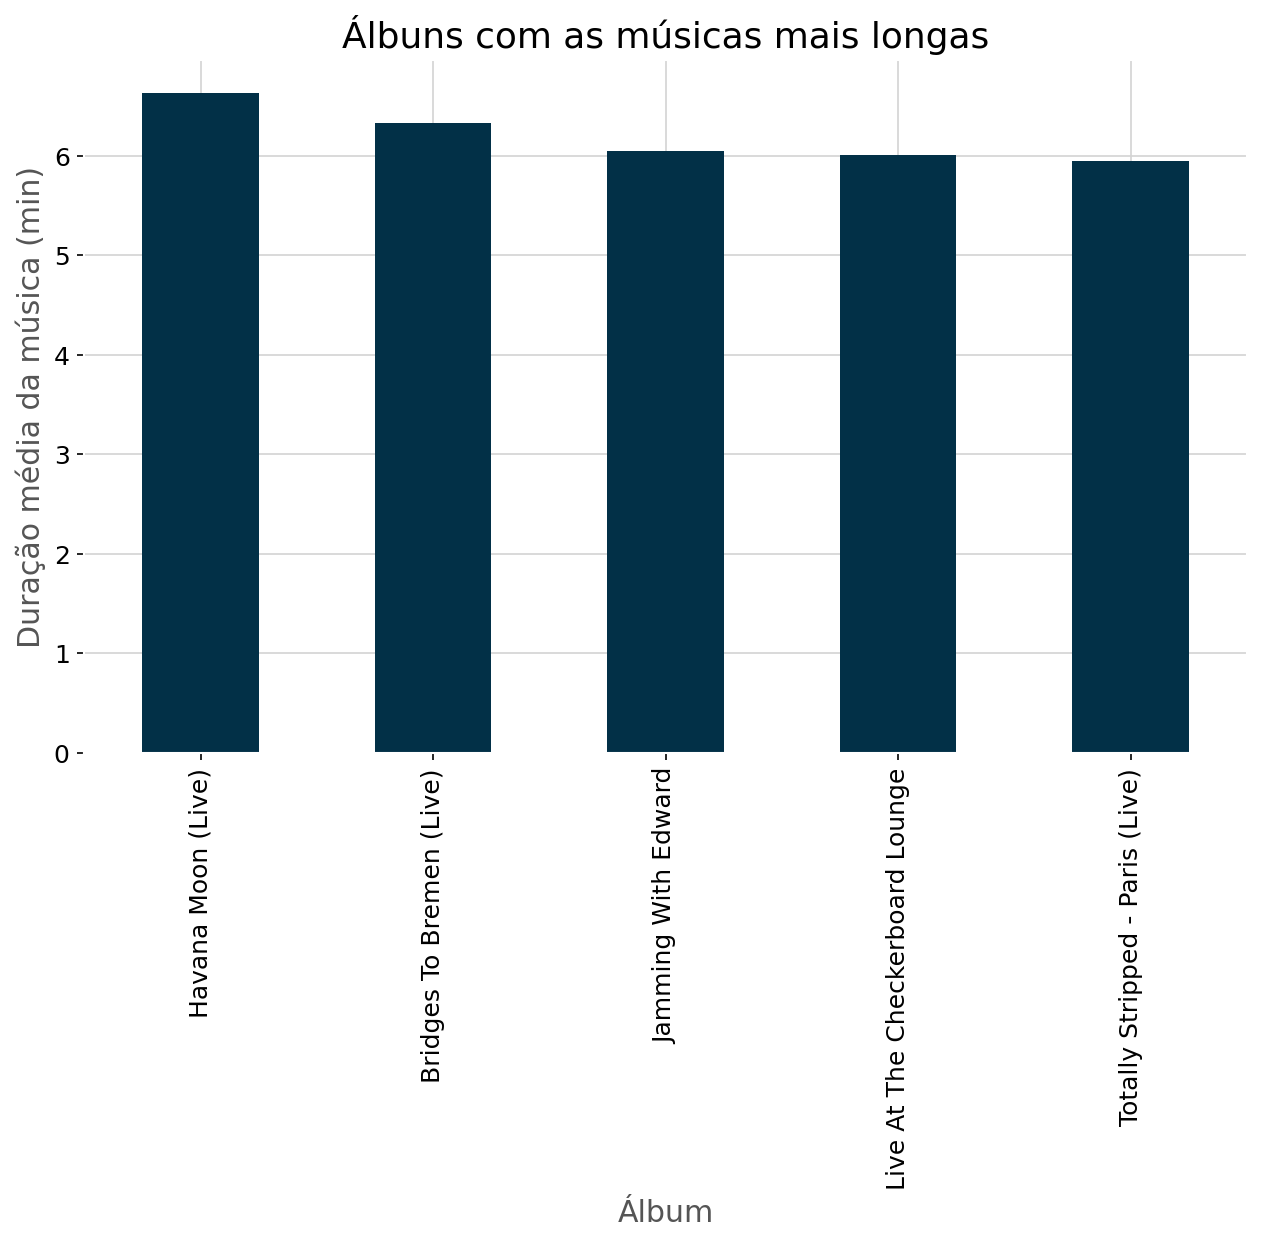

In [72]:
df_maior_duracao_musica.head(5).plot(kind='bar', color=custom_palette[0], figsize=(10, 6))
plt.xlabel('Álbum')
plt.ylabel('Duração média da música (min)')
plt.title('Álbuns com as músicas mais longas')
plt.show()

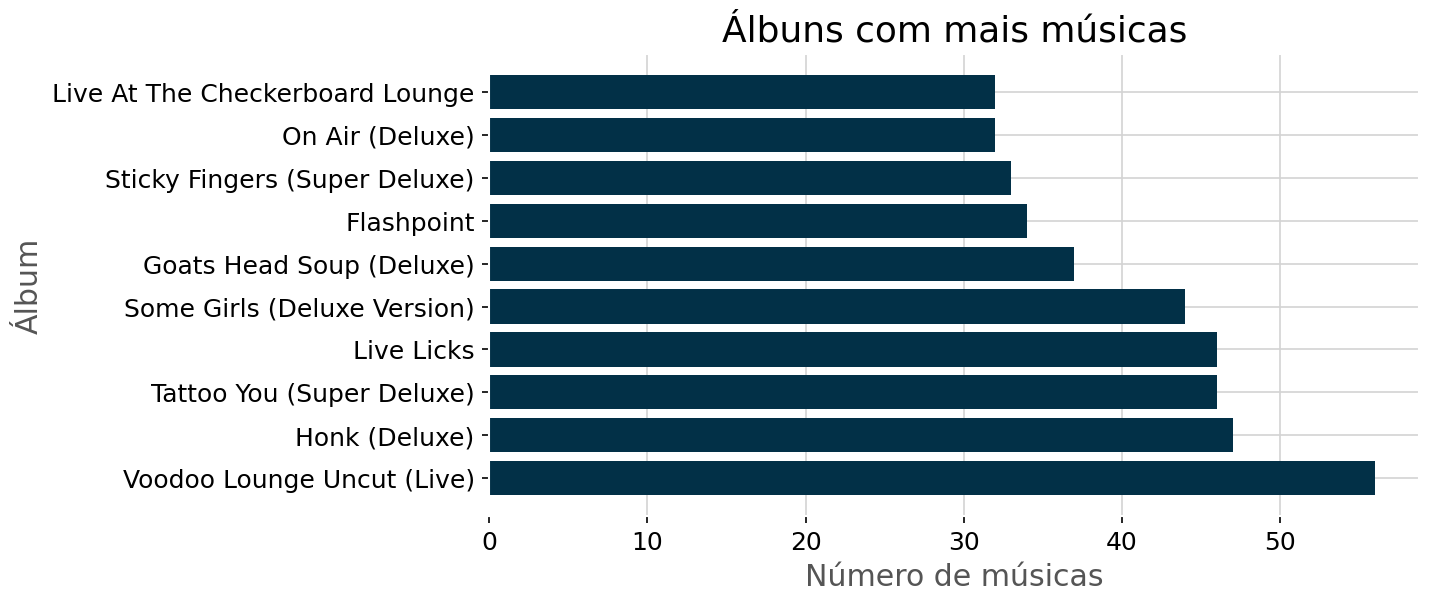

In [76]:
top_albums = df['album'].value_counts().head(10)
plt.barh(top_albums.index, top_albums.values)
plt.xlabel('Número de músicas')
plt.ylabel('Álbum')
plt.title('Álbuns com mais músicas')
plt.show()


In [78]:
df_ultima_decada = df[df['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

In [79]:
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

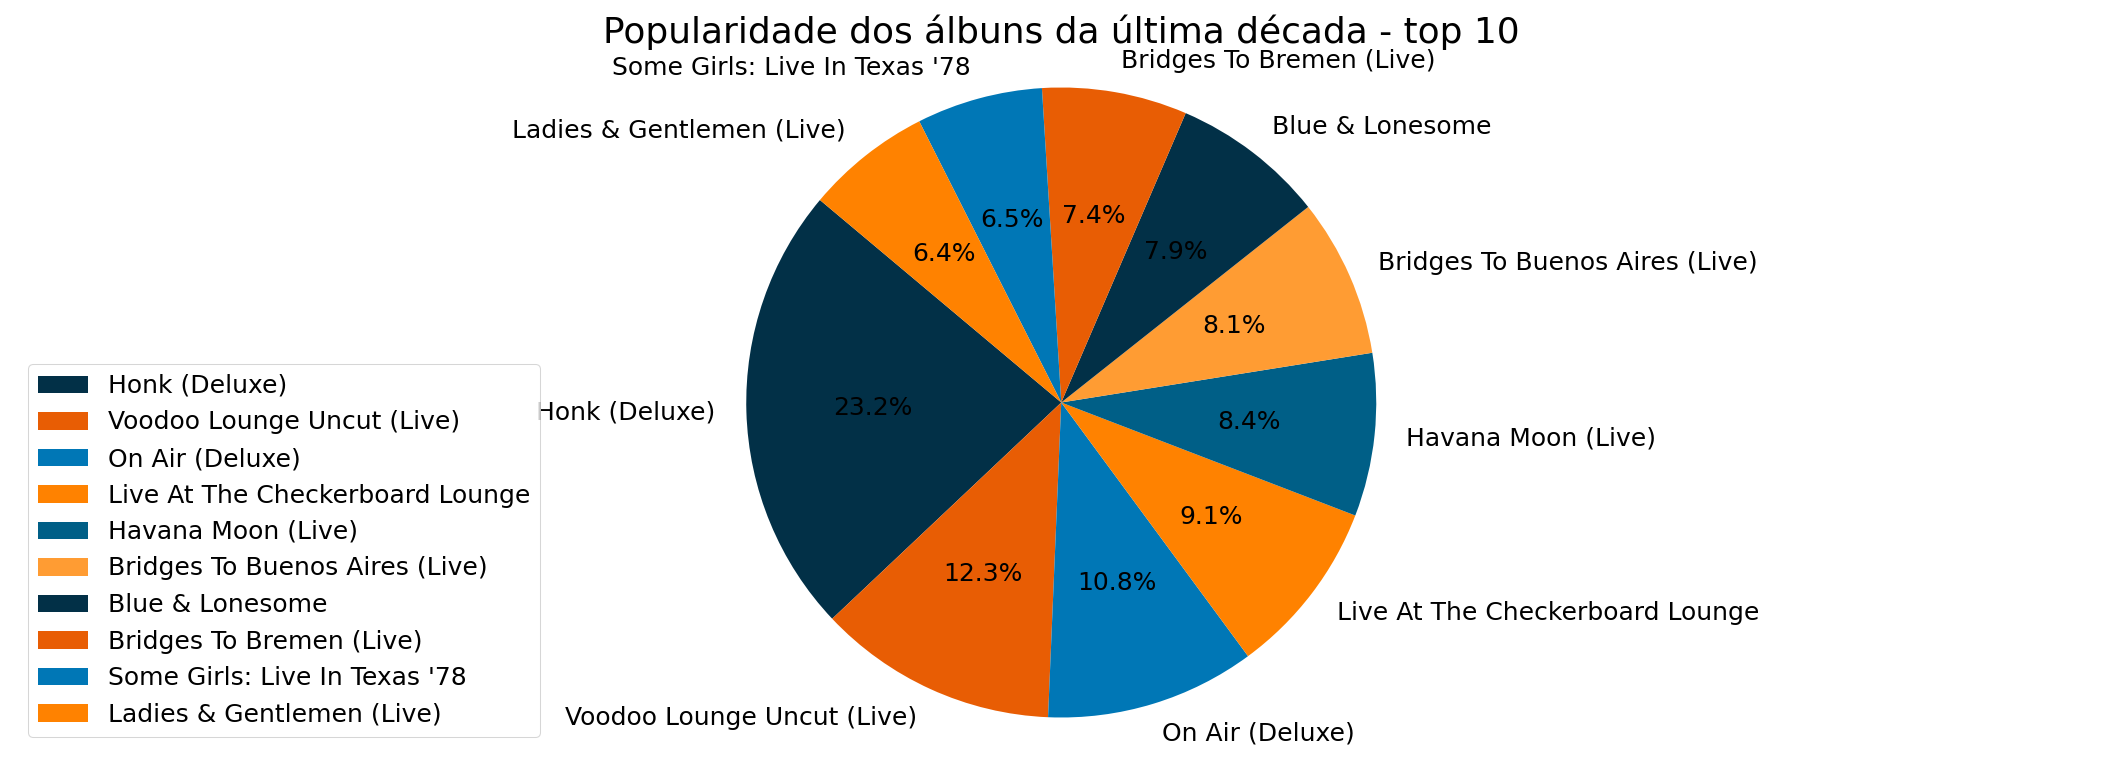

In [87]:
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album/total_popularidade*100
labels = df_porcentagem.index.to_list()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
grafico.axis('equal')
plt.title('Popularidade dos álbuns da última década - top 10')
plt.legend(labels, loc='best')
plt.show()


In [80]:
df_por_album

album
Honk (Deluxe)                      1232
Voodoo Lounge Uncut (Live)          654
On Air (Deluxe)                     573
Live At The Checkerboard Lounge     482
Havana Moon (Live)                  445
Bridges To Buenos Aires (Live)      433
Blue & Lonesome                     419
Bridges To Bremen (Live)            396
Some Girls: Live In Texas '78       344
Ladies & Gentlemen (Live)           343
Name: popularity, dtype: int64